# Import Required Libraries
Import necessary libraries such as os, subprocess, json, matplotlib, pandas, cv2, and numpy.

In [1]:
# Import necessary libraries
import os
import subprocess
import json
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import numpy as np

# Predict a simple camera-trap image

Bypassing download of already-downloaded file md_v5a.0.0.pt
Model v5a.0.0 available at /scratch/local/64386741/megadetector_models/md_v5a.0.0.pt
Running detector on 1 images...
Loading PT detector with compatibility mode classic


Fusing layers... 
Fusing layers... 
Model summary: 733 layers, 140054656 parameters, 0 gradients, 208.8 GFLOPs
Model summary: 733 layers, 140054656 parameters, 0 gradients, 208.8 GFLOPs
100%|██████████| 1/1 [00:00<00:00,  2.20it/s]


On average, for each image,
- loading took 0.11 seconds, std dev is not available (<=1 image processed)
- inference took 0.28 seconds, std dev is not available (<=1 image processed)
Detection complete. Result saved to camera_traps/03240072 - dasyprocta punctata_detections.jpg


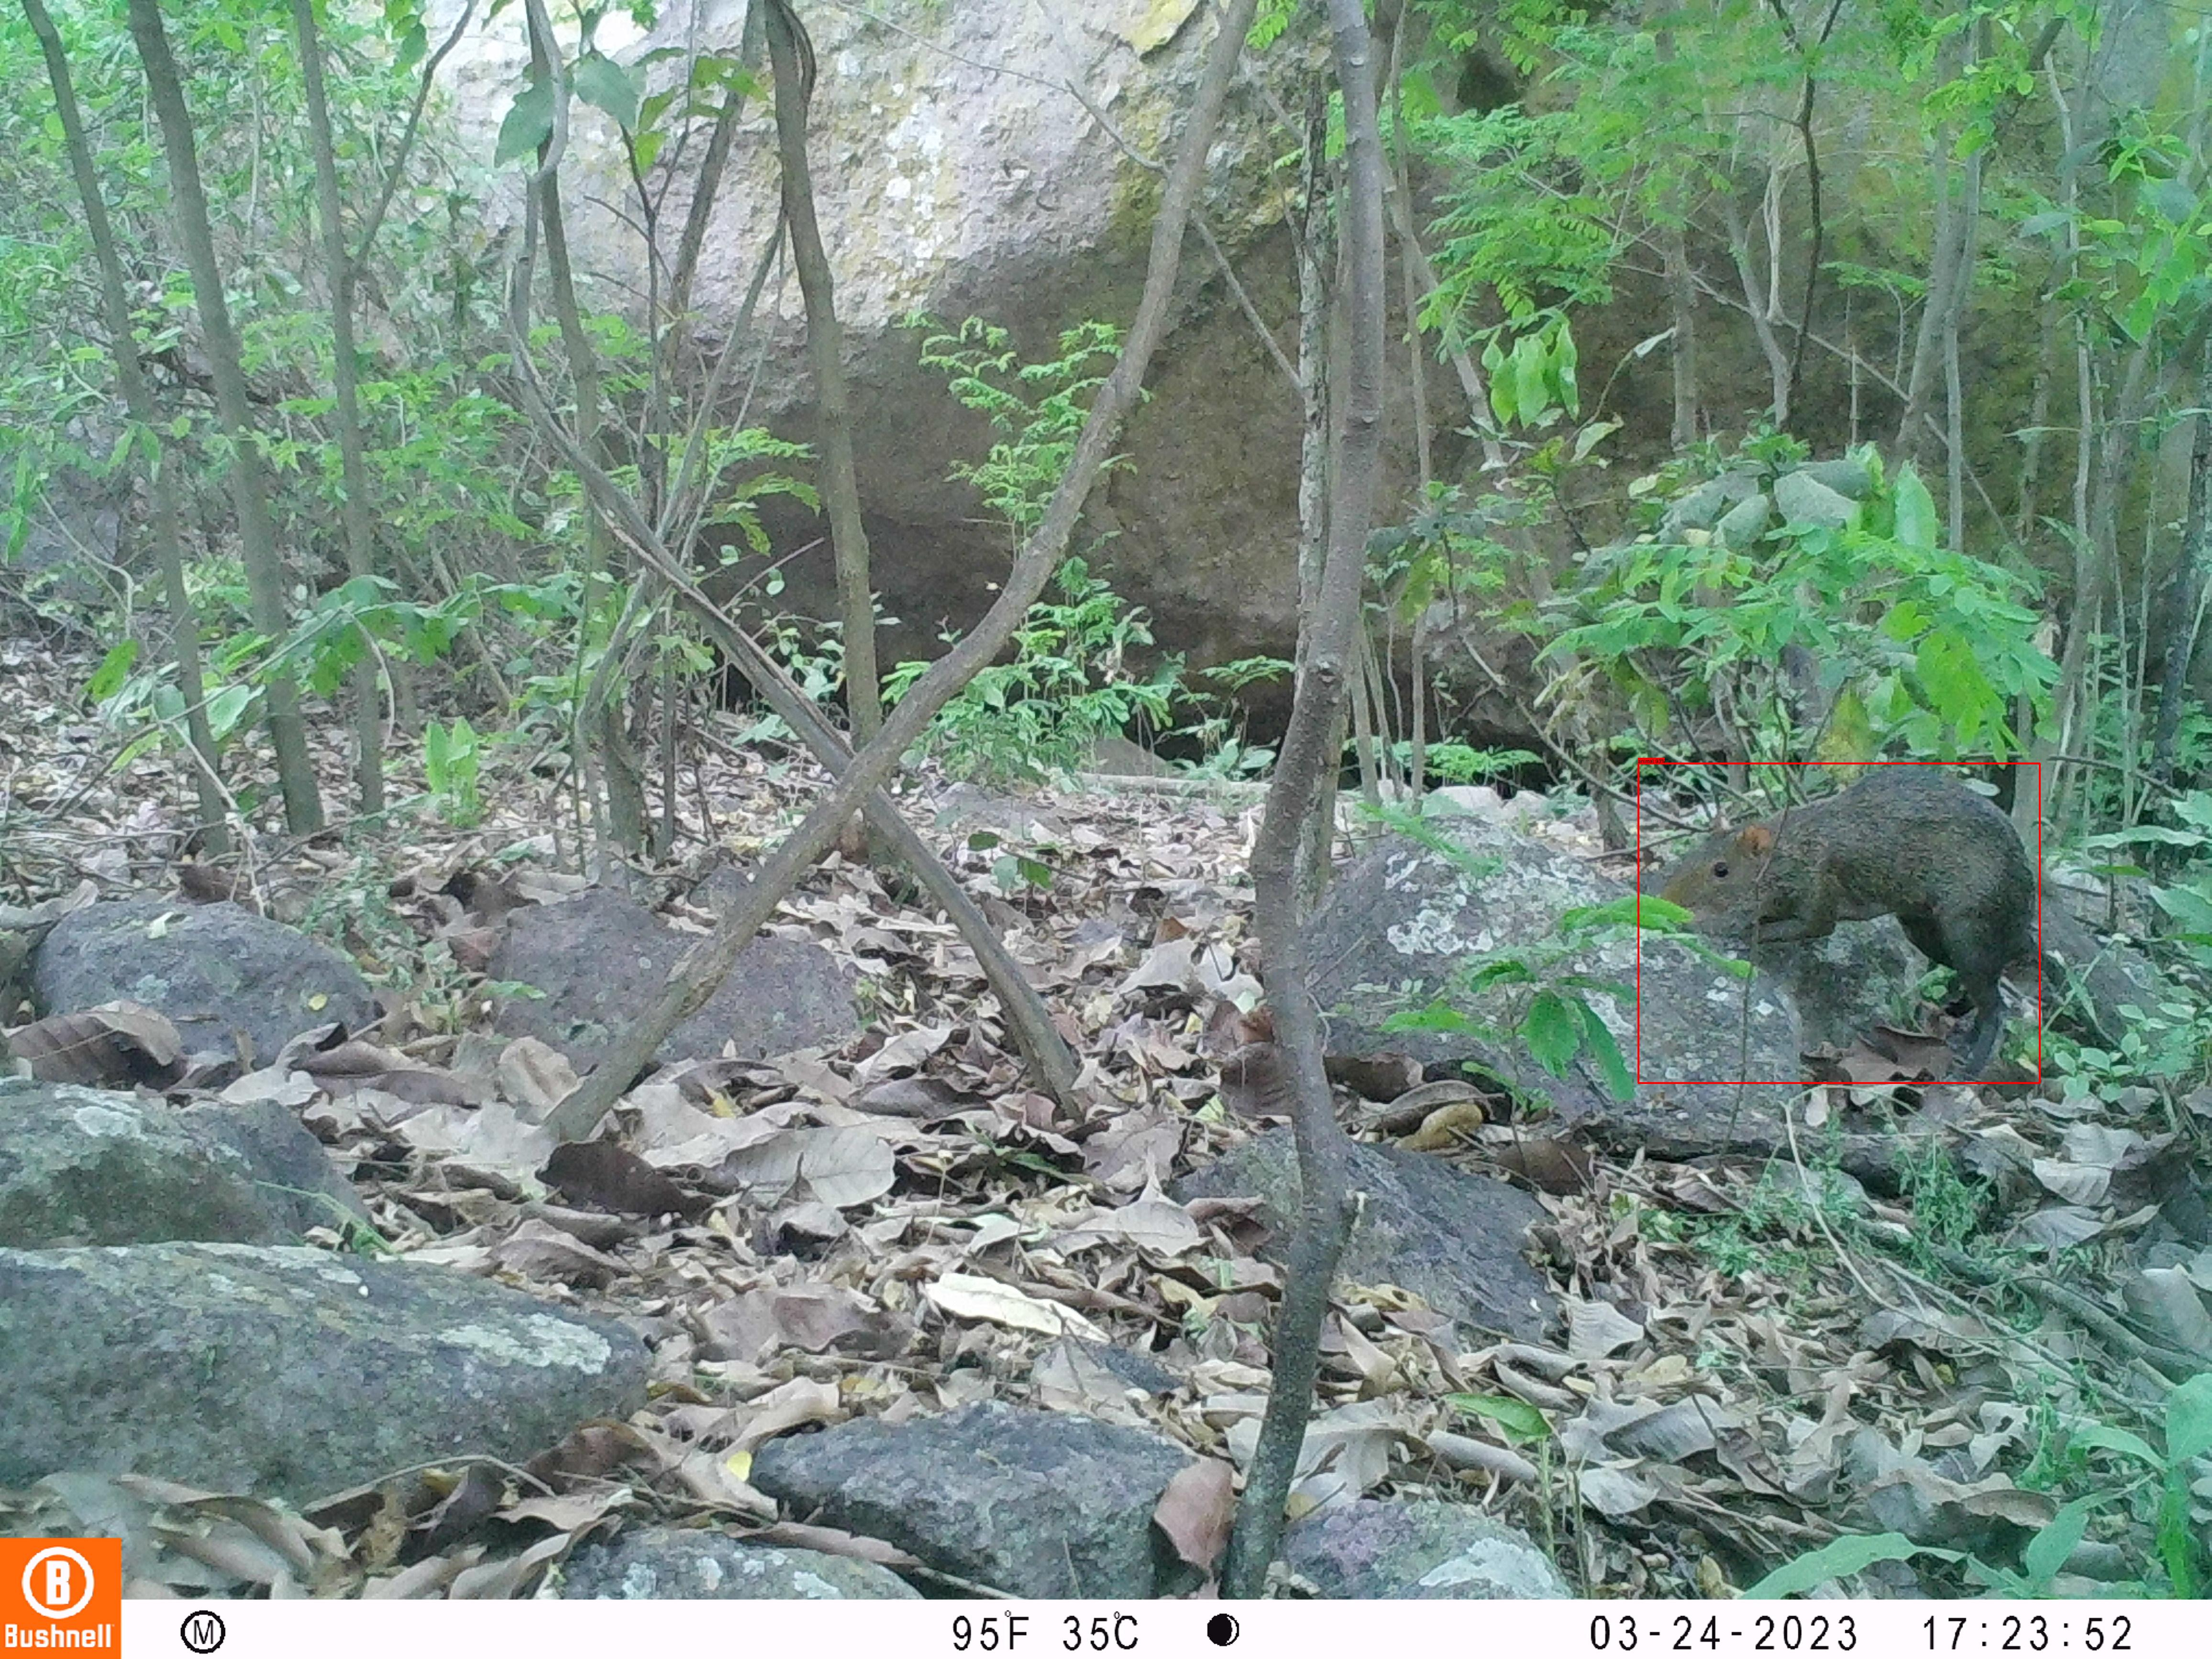

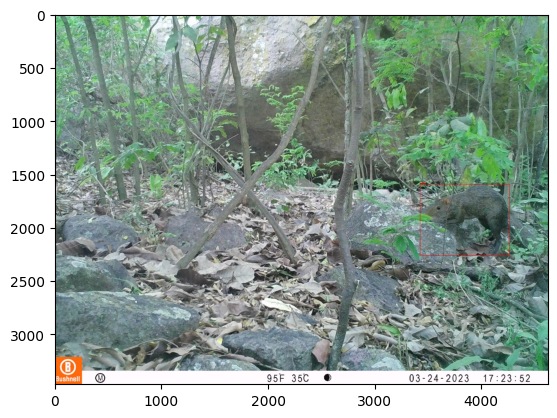

In [ ]:
import os
from IPython.display import Image, display

# Run MegaDetector on a single image
image_file = "camera_traps/03240072 - Dasyprocta punctata.JPG"  # Input image file
output_image_file = "camera_traps/03240072 - dasyprocta punctata_detections.jpg"  # Output image file with detections
model_name = "MDV5A"  # Specify the MegaDetector model name
threshold = 0.1  # Detection threshold

# Run the MegaDetector command
command = f"python -m megadetector.detection.run_detector {model_name} --image_file \"{image_file}\" --threshold {threshold}"
os.system(command)

# Display the detection result
if os.path.exists(output_image_file):
    print(f"Detection complete. Result saved to {output_image_file}")
    display(Image(filename=output_image_file))
else:
    print("Detection failed. Output image file not found.")

# Define Helper Functions
Define reusable functions for downloading files from Dropbox and processing videos with MegaDetector.

In [2]:
# Define a function to download a file from Dropbox
def download_file_from_dropbox(dropbox_url, output_path):
    """Download a file from Dropbox using curl."""
    # Check if the file already exists
    if os.path.exists(output_path):
        print(f"File {output_path} already exists. Skipping download.")
        return
    # Use curl to download the file
    command = f"curl -L -o {output_path} {dropbox_url}"
    subprocess.run(command, shell=True, check=True)

# Define a function to process a video with MegaDetector
def process_video_with_megadetector(model_name, video_path, output_json):
    """Process a video using MegaDetector via command line."""
    # Construct the command to run MegaDetector
    command = f"python -m megadetector.detection.process_video {model_name} {video_path} --output_json_file {output_json} --frame_sample 1000"
    subprocess.run(command, shell=True, check=True)

# Download File from Dropbox
Use the `download_file_from_dropbox` function to download a video file from a given Dropbox URL.

In [3]:
# Use the `download_file_from_dropbox` function to download a video file
dropbox_url = "https://www.dropbox.com/scl/fi/6l7qv1w2w6nnalx2c7xw8/2024_0906_185436_001.MP4?rlkey=hpiot4986a7ffeizdz86kusyw&dl=1"
output_path = "downloaded_file.mp4"

# Call the function to download the file
download_file_from_dropbox(dropbox_url, output_path)

# Process Video with MegaDetector
Use the `process_video_with_megadetector` function to process the downloaded video and generate a JSON output.

In [5]:
# Process the downloaded video with MegaDetector
model_name = "MDV5A"  # Specify the MegaDetector model name
video_path = output_path  # Path to the downloaded video
output_json = "output.json"  # Path to save the JSON output

# Call the function to process the video
process_video_with_megadetector(model_name, video_path, output_json)

# Confirm the JSON output file is created
if os.path.exists(output_json):
    print(f"Processing complete. Results saved to {output_json}")
else:
    print("Processing failed. JSON output file not found.")

Bypassing download of already-downloaded file md_v5a.0.0.pt
Model v5a.0.0 available at /scratch/local/64386741/megadetector_models/md_v5a.0.0.pt
Loading PT detector with compatibility mode classic


Fusing layers... 
Fusing layers... 
Model summary: 733 layers, 140054656 parameters, 0 gradients, 208.8 GFLOPs
Model summary: 733 layers, 140054656 parameters, 0 gradients, 208.8 GFLOPs


Output file saved at output.json
Processing complete. Results saved to output.json


# Extract and Plot Confidence Scores
Analyze the JSON output to extract frame numbers and confidence scores, then plot them using matplotlib.

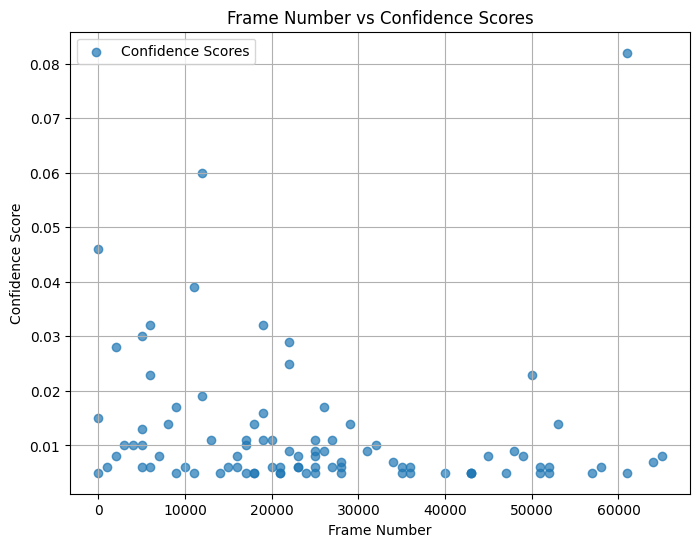

In [15]:
# Analyze the JSON output to extract frame numbers and confidence scores, then plot them using matplotlib
# Load the JSON data from the output file
with open(output_json, 'r') as file:
    data = json.load(file)

# Initialize lists to store frame numbers and confidence scores
frame_numbers = []
conf_scores = []

# Extract frame numbers and confidence scores from the JSON data
for frame in data["images"]:  # Assuming `data["images"]` contains frame objects
    frame_number = frame["frame_number"]
    for detection in frame["detections"]:
        frame_numbers.append(frame_number)
        conf_scores.append(detection["conf"])

# Plot the confidence scores against frame numbers
plt.figure(figsize=(8, 6))
plt.scatter(frame_numbers, conf_scores, label="Confidence Scores", alpha=0.7)
plt.title("Frame Number vs Confidence Scores")
plt.xlabel("Frame Number")
plt.ylabel("Confidence Score")
plt.legend()
plt.grid(True)
plt.show()

# Save Frame with Highest Confidence
Identify the frame with the highest confidence score, extract it from the video, and save it as an image file.

Highest confidence score: 0.082
Frame number with highest confidence: 61000
Frame 61000 saved to frame_61000.jpg


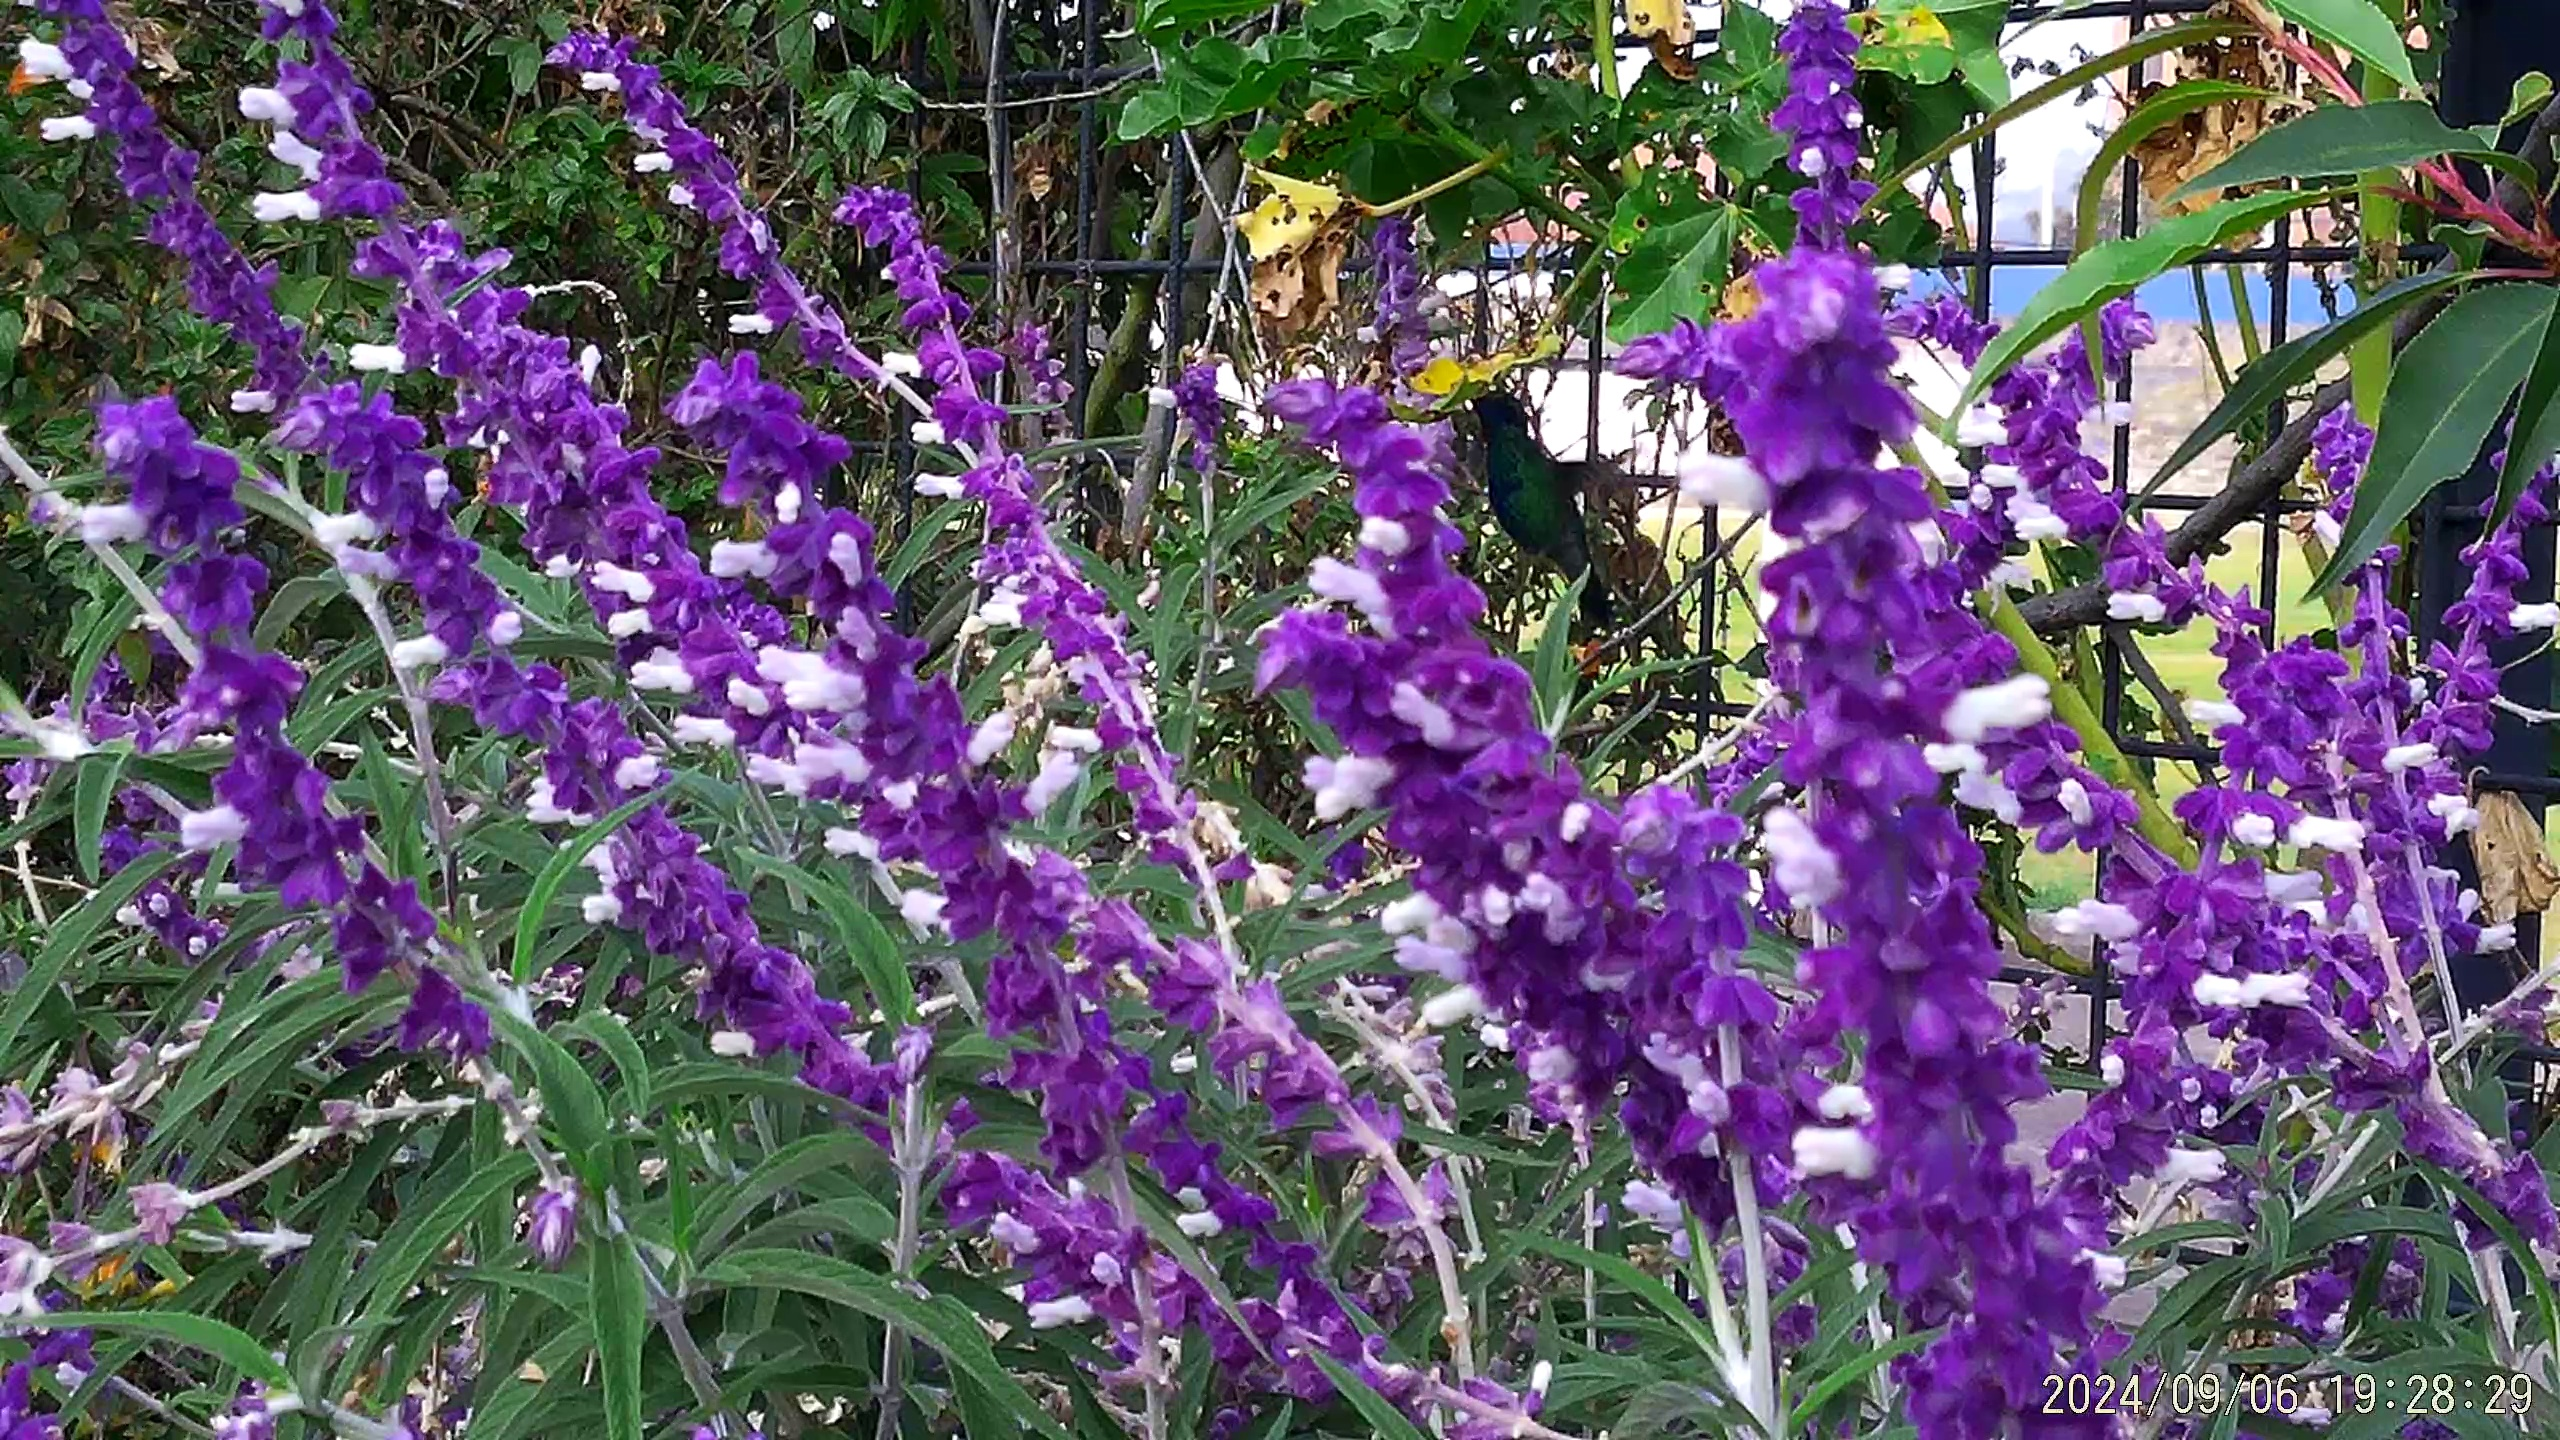

In [17]:
# Identify the frame with the highest confidence score and save it as an image file
# Create a pandas DataFrame to organize frame numbers and confidence scores
df = pd.DataFrame({
    'Frame Number': frame_numbers,
    'Confidence Score': conf_scores
})

# Find the highest confidence score and its corresponding frame number
highest_score = df['Confidence Score'].max()
highest_score_row = df[df['Confidence Score'] == highest_score]
highest_score_frame = highest_score_row['Frame Number'].values[0]

print(f"Highest confidence score: {highest_score}")
print(f"Frame number with highest confidence: {highest_score_frame}")

# Open the video file using OpenCV
cap = cv2.VideoCapture(video_path)

# Check if the video file is successfully opened
if not cap.isOpened():
    raise IOError(f"Cannot open video file: {video_path}")

# Set the video to the frame with the highest confidence score
cap.set(cv2.CAP_PROP_POS_FRAMES, highest_score_frame)

# Read the frame
ret, frame = cap.read()
if not ret:
    raise ValueError(f"Could not read frame {highest_score_frame} from video.")

# Save the frame as an image file
output_image_path = f"frame_{highest_score_frame}.jpg"
cv2.imwrite(output_image_path, frame)

# Release the video capture object
cap.release()

print(f"Frame {highest_score_frame} saved to {output_image_path}")

# Display the saved frame
display(Image(filename=output_image_path))